## User Insiders

In [ ]:
import pandas as pd

df_insider = pd.read_csv('../data/labels/user_insiders.csv')
df_insider.head()

,scenario,user_id,start,end
0,2,CMP2946,02/07/2011 12:28:06,03/04/2011 12:30:25
1,5,MBG3183,10/12/2010 13:21:59,10/12/2010 13:22:56


In [69]:
df_insider['start'] = pd.to_datetime(df_insider['start'])
df_insider['end'] = pd.to_datetime(df_insider['end'])

In [ ]:
print(f'tanggal karyawan CMP2946 masuk: {df_insider['start'][0]}')
print(f'tanggal karyawan CMP2946 keluar: {df_insider['end'][0]}')

tanggal karyawan CMP2946 masuk: 2011-02-07 12:28:06
tanggal karyawan CMP2946 keluar: 2011-03-04 12:30:25


In [92]:
print(f'tanggal karyawan MBG3183 masuk: {df_insider['start'][1]}')
print(f'tanggal karyawan MBG3183 keluar: {df_insider['end'][1]}')

tanggal karyawan MBG3183 masuk: 2010-10-12 13:21:59
tanggal karyawan MBG3183 keluar: 2010-10-12 13:22:56


In [71]:
df_insider.to_csv('../data/labels/user_insiders.csv', index=False)

## User Labels

In [1]:
import pandas as pd

df_users = pd.read_csv('../data/labels/user_labels.csv')
df_kaggle = pd.read_csv('../data/labels/users_labels_kaggle.csv')

In [6]:
df_users['user_id'].unique()

array(['AAB0162', 'AAB0398', 'AAC0610', ..., 'ZWS3625', 'ZXM3086',
       'ZZO2997'], shape=(4000,), dtype=object)

In [8]:
user_id_check = 'MBG3183'

if user_id_check in df_users['user_id'].values:
    end_date_df1 = df_users[df_users['user_id'] == user_id_check]['end_date'].iloc[0]
    print(f"End_date untuk {user_id_check} di dataframe 1: {end_date_df1}")
else:
    print(f"{user_id_check} tidak ditemukan di dataframe 1")

if user_id_check in df_kaggle['user_id'].values:
    end_date_df2 = df_kaggle[df_kaggle['user_id'] == user_id_check]['end_date'].iloc[0]
    print(f"End_date untuk {user_id_check} di dataframe 2: {end_date_df2}")
else:
    print(f"{user_id_check} tidak ditemukan di dataframe 2")

End_date untuk MBG3183 di dataframe 1: 2010-10-12 13:22:56
End_date untuk MBG3183 di dataframe 2: 2011-06-01


## EDA details

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/labels/details.csv')

df.head()

,timestamp,user_id,pc_id,resource_path,activity,labels
0,2010-10-12 13:21:59,MBG3183,PC-3906,https://www.dropbox.com/home/Qebcobk2039005820...,WWW Upload,jobsearch
1,2010-10-12 13:22:04,MBG3183,PC-3906,https://www.dropbox.com/home/Qebcobk2039005820...,WWW Upload,jobsearch
2,2010-10-12 13:22:27,MBG3183,PC-3906,https://www.dropbox.com/home/Qebcobk2039005820...,WWW Upload,jobsearch
3,2010-10-12 13:22:56,MBG3183,PC-3906,https://www.dropbox.com/home/Qebcobk2039005820...,WWW Upload,jobsearch
4,2011-02-02 09:08:00,CMP2946,PC-9447,http://linkedin.com/PybfvatCebwrpgwbofrnepu147...,WWW Visit,"Closing Project,jobsearch"


In [85]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [86]:
df_sorted = df.sort_values('timestamp').reset_index(drop=True)

df_sorted.head()

,timestamp,user_id,pc_id,resource_path,activity,labels
0,2010-10-12 13:21:59,MBG3183,PC-3906,https://www.dropbox.com/home/Qebcobk2039005820...,WWW Upload,jobsearch
1,2010-10-12 13:22:04,MBG3183,PC-3906,https://www.dropbox.com/home/Qebcobk2039005820...,WWW Upload,jobsearch
2,2010-10-12 13:22:27,MBG3183,PC-3906,https://www.dropbox.com/home/Qebcobk2039005820...,WWW Upload,jobsearch
3,2010-10-12 13:22:56,MBG3183,PC-3906,https://www.dropbox.com/home/Qebcobk2039005820...,WWW Upload,jobsearch
4,2011-02-02 09:08:00,CMP2946,PC-9447,http://linkedin.com/PybfvatCebwrpgwbofrnepu147...,WWW Visit,"Closing Project,jobsearch"


In [87]:
# Buat kolom tanggal
df['date'] = df['timestamp'].dt.date

# Hitung aktivitas per hari
daily_activity = df.groupby('date').size()

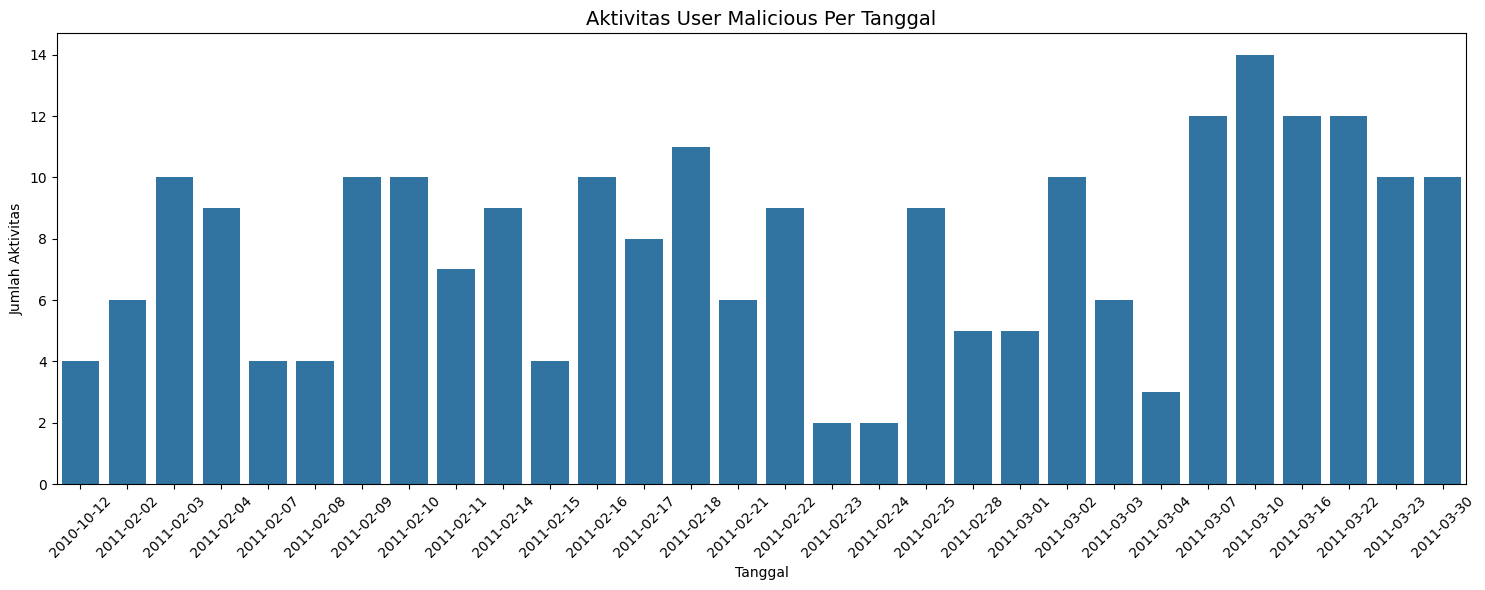

Total aktivitas: 233
Periode: 2010-10-12 13:21:59 - 2011-03-30 16:27:27


In [88]:
# Buat dataframe untuk plotting
daily_df = daily_activity.reset_index()
daily_df.columns = ['date', 'count']

# Buat plot dengan seaborn
plt.figure(figsize=(15, 6))
sns.barplot(data=daily_df, x='date', y='count')
plt.title('Aktivitas User Malicious Per Tanggal', fontsize=14)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Aktivitas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Total aktivitas: {len(df)}")
print(f"Periode: {df['timestamp'].min()} - {df['timestamp'].max()}")

In [67]:
df_sorted.to_csv('../data/labels/details.csv', index=False)